In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import config
from datetime import datetime

# 1. Authenticate to Twitter

In [2]:
# Authenticate
auth = tw.OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [5]:
# Use tweepy cursor
hashtag = '#trump OR #biden'
num = 500
# .items(num) brings back num tweets
query = tw.Cursor(api.search_tweets, q=hashtag).items(num)
# bring info into array for easier access to pandas later on
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

In [6]:
print(tweets[0])

{'Tweets': 'RT @CupofJoeintheD2: @BillPascrell Who ordered the #IRS not to audit #Trump taxes the first 2 years in Office??!! #HumptyTrumpty needs to b…', 'Timestamp': datetime.datetime(2022, 12, 27, 0, 53, 4, tzinfo=datetime.timezone.utc)}


In [8]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,RT @CupofJoeintheD2: @BillPascrell Who ordered...,2022-12-27 00:53:04+00:00
1,"@WeberDarlene Yes, 100%! #Jan6th, everyone kne...",2022-12-27 00:53:00+00:00
2,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:53+00:00
3,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:23+00:00
4,RT @Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pend...,2022-12-27 00:52:16+00:00


In [9]:
trump_refs = ['DonaldTrump','Donald Trump','Donald','Trump','Trump\'s']
biden_refs = ['JoeBiden','Joe Biden','Joe','Biden','Biden\'s']

In [11]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref)!=-1:
            flag = 1
    return flag
df['Trump'] = df['Tweets'].apply(lambda x: identify_subject(x, trump_refs))
df['Biden'] = df['Tweets'].apply(lambda x: identify_subject(x, biden_refs))

In [15]:
df[df['Biden']==1]

,Tweets,Timestamp,Trump,Biden
0,RT @CupofJoeintheD2: @BillPascrell Who ordered...,2022-12-27 00:53:04+00:00,1,1
2,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:53+00:00,0,1
3,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:23+00:00,0,1
4,RT @Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pend...,2022-12-27 00:52:16+00:00,0,1
5,RT @GeorgeGarbow3: #ElonMusk #FreeSpeech #MAGA...,2022-12-27 00:52:16+00:00,1,1
...,...,...,...,...
486,Here’s How Many Migrants Have Crossed The Sout...,2022-12-26 23:37:44+00:00,0,1
487,And the Oscar goes to.... #Zelensky #Biden htt...,2022-12-26 23:37:33+00:00,0,1
489,🇺🇸🇺🇦 Mi è sfuggita la parte importante dell'in...,2022-12-26 23:37:24+00:00,0,1
493,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-26 23:36:38+00:00,0,1


# 3. Preprocess

In [18]:
# import stopwords
import nltk
from nltk.corpus import stopwords

# import textblob
from textblob import Word, TextBlob

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ocnwaokoro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ocnwaokoro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ocnwaokoro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
stopwords = stopwords.words('english')
custom_stopwords = ['RT']

In [25]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]','')
    preprocessed_tweet = ' '.join(word for word in preprocessed_tweet.split() if word not in stopwords)
    preprocessed_tweet = ' '.join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    # lemmatize takes a word & reduces it to its base form (i.e. debates -> debate)
    preprocessed_tweet = ' '.join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x:  preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet
0,RT @CupofJoeintheD2: @BillPascrell Who ordered...,2022-12-27 00:53:04+00:00,1,1,@CupofJoeintheD2: @BillPascrell Who ordered #I...
1,"@WeberDarlene Yes, 100%! #Jan6th, everyone kne...",2022-12-27 00:53:00+00:00,1,0,"@WeberDarlene Yes, 100%! #Jan6th, everyone kne..."
2,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:53+00:00,0,1,@mmtchi: 🔥#Twitterfiles10 spécial #Covid. Comm...
3,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:23+00:00,0,1,@mmtchi: 🔥#Twitterfiles10 spécial #Covid. Comm...
4,RT @Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pend...,2022-12-27 00:52:16+00:00,0,1,@Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pendant...


# 4. Calculate Sentiment

In [26]:
# polarity: score from -1 to 1 about how positive or negative a sentiment is
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
# subjectivity: score from 0 to 1 that dictates how much a piece of text is influenced by emotion
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [28]:
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,RT @CupofJoeintheD2: @BillPascrell Who ordered...,2022-12-27 00:53:04+00:00,1,1,@CupofJoeintheD2: @BillPascrell Who ordered #I...,0.390625,0.333333
1,"@WeberDarlene Yes, 100%! #Jan6th, everyone kne...",2022-12-27 00:53:00+00:00,1,0,"@WeberDarlene Yes, 100%! #Jan6th, everyone kne...",0.000000,0.000000
2,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:53+00:00,0,1,@mmtchi: 🔥#Twitterfiles10 spécial #Covid. Comm...,0.000000,0.000000
3,RT @mmtchi: 🔥#Twitterfiles10 spécial #Covid.\n...,2022-12-27 00:52:23+00:00,0,1,@mmtchi: 🔥#Twitterfiles10 spécial #Covid. Comm...,0.000000,0.000000
4,RT @Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pend...,2022-12-27 00:52:16+00:00,0,1,@Circonscripti18: ⚡FLASH 📺 #Donbass 🇷🇺 Pendant...,0.000000,0.000000


In [31]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Trump                                                         
1     -0.009733  1.0 -0.5    0.0     0.226506  1.0  0.0    0.0

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Biden                                                         
1      0.030401  0.8 -0.8    0.0      0.13874  1.0  0.0    0.0

# 5. Visualize

In [33]:
biden = df[df['Biden']==1][['Timestamp','polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
# ten tweet rolling average that only starts after 3 periods
biden['MA Polarity'] = biden['polarity'].rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp','polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump['polarity'].rolling(10, min_periods=3).mean()

In [35]:
display(trump.head())

,Timestamp,polarity,MA Polarity
498,2022-12-26 23:36:00+00:00,0.00,NaN
497,2022-12-26 23:36:03+00:00,-0.50,NaN
492,2022-12-26 23:36:40+00:00,0.00,-0.166667
488,2022-12-26 23:37:30+00:00,-0.05,-0.137500
485,2022-12-26 23:38:00+00:00,0.00,-0.110000


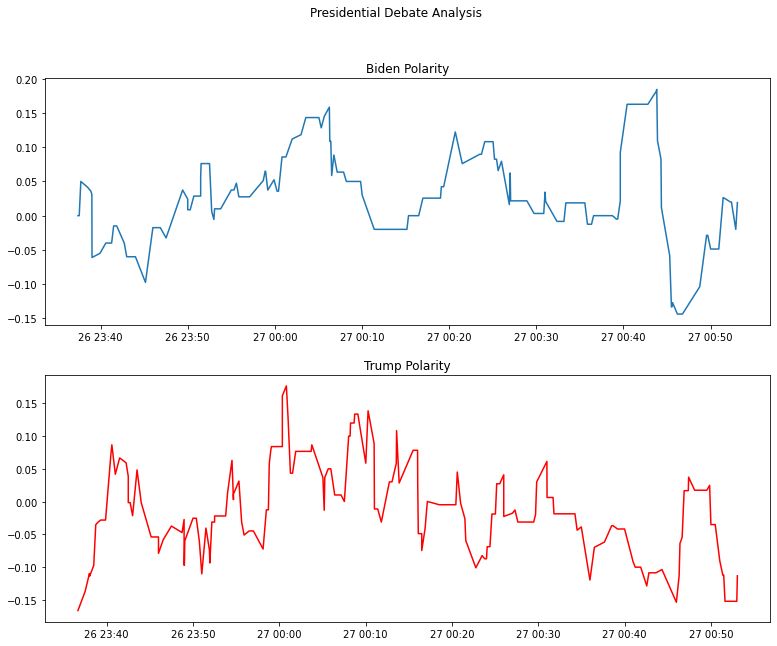

In [36]:
repub = 'red'
demo = 'blue'

fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()